## Подключение библиотек и скриптов

In [417]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Отключаем предупреждения

In [418]:
import warnings
warnings.filterwarnings('ignore')

### Задаём везде одинаковый размер шрифта

In [419]:
matplotlib.rcParams.update({'font.size': 14})

### Функция для подсчёта метрик 

In [420]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()


## Путь к директориям

In [421]:
TRAIN_DATASET_PATH = '/Users/polinashubenok/Desktop/DS_projects/HW/Biblioteki_DS/Kursovoi/train.csv'
TEST_DATASET_PATH = '/Users/polinashubenok/Desktop/DS_projects/HW/Biblioteki_DS/Kursovoi/test.csv'

## Загрузка данных

In [422]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [423]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


## 1. Обзор обучающего датасета
### Информация о датасете

In [424]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [425]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

### Информация о типах значений

In [426]:
train_df.dtypes.value_counts()

int64      9
float64    8
object     3
dtype: int64

### Количество строк на трейне и тесте

In [427]:
print(train_df.shape[0])
print(test_df.shape[0])

10000
5000


### Дествительно ли треин на 1 столбец меньше теста?

In [428]:
train_df.shape[1] - 1 == test_df.shape[1]

True

### Приведение типов
### Переведём ID и DistrictId в строковый тип данных, что бы они не участвовали в анализе вещественных признаков. 

In [429]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [430]:
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

## 2. Проводим разведочный обзор данных.


### - Изучаем целевую переменную: построим гистограмму целевой переменной price.

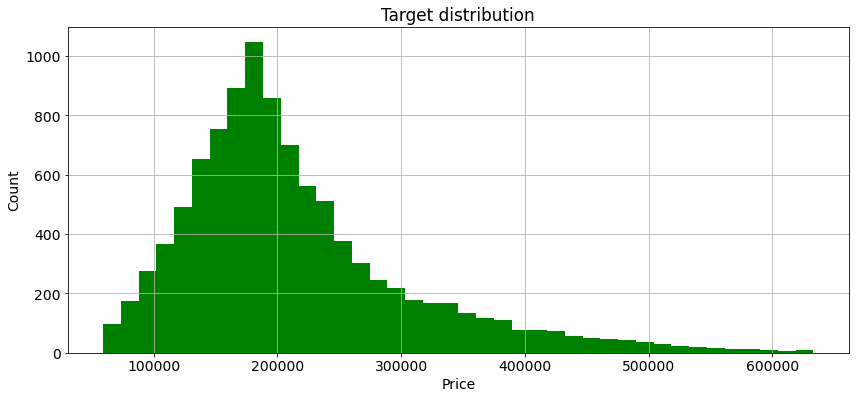

In [431]:
plt.figure(figsize = (14, 6))

train_df['Price'].hist(bins=40, color='green')
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

### - Изучим количественные переменные

In [432]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [433]:
train_df.nunique()

Id               10000
DistrictId         205
Rooms                9
Square           10000
LifeSquare        7887
KitchenSquare       58
Floor               33
HouseFloor          44
HouseYear           97
Ecology_1          129
Ecology_2            2
Ecology_3            2
Social_1            51
Social_2           142
Social_3            30
Healthcare_1        79
Helthcare_2          7
Shops_1             16
Shops_2              2
Price            10000
dtype: int64

### - Изучим качественные (номинативные) переменные

In [434]:
cat_colnames = train_df.select_dtypes(include='object').columns.tolist()
cat_colnames

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [435]:
for cat_colname in cat_colnames[1:]:
    print(str(cat_colname) + '\n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

DistrictId

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64
****************************************************************************************************

Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64
****************************************************************************************************

Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64
****************************************************************************************************

Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64
****************************************************************************************************



### - Обработка выбросов (аномальных значений)

In [436]:
train_df['Rooms'].median()

2.0

#### Rooms. Cколько уникальных значений в датасете.

In [437]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [438]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

 #### Rooms. Удаление выбросов

In [439]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,NaN,0,0,B,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.553407,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.720850,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,168106.007630,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,NaN,0,6,B,343995.102962,0


In [440]:
test_df['Rooms_outlier'] = 0
test_df.loc[(train_df['Rooms'] == 0) | (test_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Rooms_outlier
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B,0
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,0
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,0
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B,0
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B,0


In [441]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()

In [442]:
test_df.loc[test_df['Rooms'] == 0, 'Rooms'] = 1
test_df.loc[test_df['Rooms'] >= 6, 'Rooms'] = test_df['Rooms'].median()

In [443]:
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [444]:
test_df['Rooms'].value_counts()

2.0    2033
1.0    1771
3.0    1099
4.0      90
5.0       7
Name: Rooms, dtype: int64

In [445]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Rooms_outlier
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.887600,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399,0.001200
std,0.811438,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865,0.034622
min,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942,0.000000
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,0.000000
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171,0.000000
max,5.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000


In [446]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Rooms_outlier
count,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.00000
mean,1.905800,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,0.00100
std,0.806137,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,0.03161
min,1.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,0.00000
50%,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,0.00000
75%,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,0.00000
max,5.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.00000


### Square, KitchenSquare, KitchenSquare.

#### Оценим сколько уникальных значений содержит признак


In [447]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Rooms_outlier
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.887600,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399,0.001200
std,0.811438,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865,0.034622
min,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942,0.000000
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,0.000000
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171,0.000000
max,5.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000


#### Удаляем выбросы

In [448]:
train_df = train_df[train_df['Square'].isnull() |
                    (train_df['Square'] < train_df['Square'].quantile(.99)) &
                    (train_df['Square'] > train_df['Square'].quantile(.01))]

train_df = train_df[train_df['LifeSquare'].isnull() |
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.99)) &
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.01))]

train_df = train_df[train_df['KitchenSquare'].isnull() |
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.99)) &
                    (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.01))]

In [449]:
test_df = test_df[test_df['Square'].isnull() |
                    (test_df['Square'] < test_df['Square'].quantile(.99)) &
                    (test_df['Square'] > test_df['Square'].quantile(.01))]

test_df = test_df[test_df['LifeSquare'].isnull() |
                    (test_df['LifeSquare'] < test_df['LifeSquare'].quantile(.99)) &
                    (test_df['LifeSquare'] > test_df['LifeSquare'].quantile(.01))]

test_df = test_df[test_df['KitchenSquare'].isnull() |
                    (test_df['KitchenSquare'] < test_df['KitchenSquare'].quantile(.99)) &
                    (test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.01))]

In [450]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Rooms_outlier
count,8881.000000,8881.000000,7296.000000,8881.000000,8881.000000,8881.000000,8.881000e+03,8881.000000,8881.000000,8881.000000,8881.000000,4799.000000,8881.000000,8881.000000,8881.000000,8881.000000
mean,1.884022,54.809487,34.830304,6.075329,8.446684,12.826934,4.242532e+03,0.119620,26.071163,5630.480014,8.403783,1156.072932,1.392636,4.438577,214939.479049,0.000563
std,0.795861,16.225349,14.280535,3.503611,5.133763,6.369206,2.127571e+05,0.119654,17.269698,3977.902810,24.295214,1032.814421,1.492092,4.837340,89654.209673,0.023722
min,1.000000,29.719934,2.941437,1.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000
25%,1.000000,41.637555,22.863805,1.000000,4.000000,9.000000,1.972000e+03,0.017647,10.000000,2370.000000,0.000000,325.000000,0.000000,1.000000,156934.440088,0.000000
50%,2.000000,51.656012,32.459931,6.000000,7.000000,14.000000,1.977000e+03,0.075779,25.000000,5562.000000,2.000000,990.000000,1.000000,3.000000,194240.534503,0.000000
75%,2.000000,64.720916,44.119769,9.000000,12.000000,17.000000,2.000000e+03,0.194489,36.000000,7614.000000,5.000000,1548.000000,3.000000,6.000000,250381.580780,0.000000
max,5.000000,117.855969,88.381356,14.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000


In [451]:
mask = train_df["Square"] < train_df["KitchenSquare"] + train_df["LifeSquare"]
train_df.loc[mask].describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Rooms_outlier
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,250.000000,652.000000,652.000000,652.000000,652.0
mean,1.648773,53.937687,53.975295,4.766871,9.946319,14.760736,2000.834356,0.107157,16.115031,3707.608896,9.110429,889.080000,0.878834,3.461656,190942.451129,0.0
std,0.735922,14.718972,14.697441,4.290268,5.805755,8.616302,19.706764,0.109550,16.929164,3944.012120,29.387084,723.285122,1.344859,5.290638,85871.143763,0.0
min,1.000000,29.719934,22.892380,1.000000,1.000000,0.000000,1918.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59877.592523,0.0
25%,1.000000,41.318307,41.593619,1.000000,5.000000,10.000000,1977.000000,0.011654,2.000000,629.000000,0.000000,540.000000,0.000000,0.000000,132108.091249,0.0
50%,1.000000,51.306312,50.900047,1.000000,9.000000,17.000000,2015.000000,0.072158,6.000000,1564.000000,1.000000,705.000000,0.000000,1.000000,171791.694650,0.0
75%,2.000000,64.653077,64.342662,10.000000,14.000000,17.000000,2017.000000,0.195781,26.000000,6138.000000,4.000000,1046.000000,2.000000,5.000000,228633.695836,0.0
max,5.000000,89.118209,88.381356,14.000000,28.000000,117.000000,2020.000000,0.486246,74.000000,19083.000000,141.000000,4508.000000,6.000000,23.000000,573539.701956,0.0


In [452]:
mask = test_df["Square"] < test_df["KitchenSquare"] + test_df["LifeSquare"]
test_df.loc[mask].describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Rooms_outlier
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,136.000000,339.000000,339.000000,339.0
mean,1.758112,55.429703,55.245002,5.303835,9.707965,14.702065,1998.920354,0.102495,17.191740,3905.504425,9.581121,748.764706,0.899705,3.796460,0.0
std,0.746124,15.202127,15.226325,4.292454,5.733244,7.981656,19.809063,0.107895,17.307225,3932.507797,31.434280,628.076655,1.321858,5.652919,0.0
min,1.000000,30.695734,28.464467,1.000000,1.000000,0.000000,1955.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,0.0
25%,1.000000,42.055523,42.524393,1.000000,5.000000,10.000000,1977.000000,0.011654,2.000000,629.000000,0.000000,229.000000,0.000000,0.000000,0.0
50%,2.000000,54.614346,54.254344,5.000000,9.000000,17.000000,2014.000000,0.069753,9.000000,1892.000000,1.000000,540.000000,0.000000,1.000000,0.0
75%,2.000000,65.621743,66.127111,10.000000,13.000000,17.000000,2016.000000,0.194489,33.000000,6398.000000,4.000000,1046.000000,2.000000,5.000000,0.0
max,4.000000,88.136651,85.621397,13.000000,26.000000,99.000000,2019.000000,0.437885,74.000000,19083.000000,141.000000,2857.000000,6.000000,23.000000,0.0


In [547]:
train_df.loc[train_df['LifeSquare'] < 10, 'LifeSquare'] = 10

In [548]:
test_df.loc[test_df['LifeSquare'] < 10, 'LifeSquare'] = 10

In [549]:
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [550]:
test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [551]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier
count,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.00000,8881.000000,8881.000000,8881.0
mean,1.884022,54.809487,36.559059,6.589798,7.271141,12.849003,1984.572233,0.119620,0.989979,0.969936,26.071163,5630.480014,8.403783,1079.740345,1.392636,4.438577,0.92940,214939.479049,0.000563,0.0
std,0.795861,16.225349,15.036634,2.795883,5.041395,6.348942,18.373202,0.119654,0.099610,0.170774,17.269698,3977.902810,24.295214,763.680739,1.492092,4.837340,0.25617,89654.209673,0.023722,0.0
min,1.000000,29.719934,10.000000,3.000000,0.000000,1.000000,1914.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.00000,59174.778028,0.000000,0.0
25%,1.000000,41.637555,23.916309,3.000000,3.000000,9.000000,1972.000000,0.017647,1.000000,1.000000,10.000000,2370.000000,0.000000,810.000000,0.000000,1.000000,1.00000,156934.440088,0.000000,0.0
50%,2.000000,51.656012,33.273700,6.000000,6.000000,14.000000,1977.000000,0.075779,1.000000,1.000000,25.000000,5562.000000,2.000000,990.000000,1.000000,3.000000,1.00000,194240.534503,0.000000,0.0
75%,2.000000,64.720916,46.039589,9.000000,10.000000,17.000000,2000.000000,0.194489,1.000000,1.000000,36.000000,7614.000000,5.000000,1036.000000,3.000000,6.000000,1.00000,250381.580780,0.000000,0.0
max,5.000000,117.855969,102.809473,14.000000,42.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.00000,633233.466570,1.000000,0.0


In [552]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Rooms_outlier,HouseFloor_outlier
count,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000
mean,1.905554,55.150882,36.858716,6.561727,7.494491,12.804812,1984.030358,0.120233,0.989881,0.968518,26.145042,5644.405892,8.627839,1041.579267,1.389926,4.431527,0.926018,0.000675,0.153137
std,0.790510,16.344318,15.176452,2.735153,5.083814,6.307615,18.520131,0.119908,0.100095,0.174636,17.301028,3998.022400,24.352123,785.756921,1.481773,4.811164,0.261772,0.025967,0.360160
min,1.000000,30.062518,10.000000,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.774920,24.109106,4.000000,4.000000,9.000000,1972.000000,0.019509,1.000000,1.000000,11.000000,2370.000000,0.000000,800.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,52.034775,33.587620,6.000000,6.000000,12.000000,1977.000000,0.075779,1.000000,1.000000,25.000000,5562.000000,2.000000,900.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,2.000000,65.322366,46.487299,9.000000,11.000000,17.000000,1999.000000,0.195781,1.000000,1.000000,37.000000,7614.000000,5.000000,1036.000000,3.000000,6.000000,1.000000,0.000000,0.000000
max,5.000000,115.008223,94.156579,13.000000,46.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,1.000000,1.000000


### HouseFloor, Floor. 

#### Смотрим уникальные значения

In [459]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 42])

In [460]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,  37.,
        39.,  40.,  44.,  45.,  48.,  99., 117.])

In [461]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1417

In [462]:
test_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 34, 38, 46, 78])

In [463]:
test_df['HouseFloor'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 29., 30., 31., 32., 33., 37., 39., 40., 48., 99.])

In [504]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

#### Заменяем нулевые этажи на медиану

In [500]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [482]:
test_df['HouseFloor_outlier'] = 0
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
test_df.loc[test_df['Floor'] > test_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [483]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [484]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()

In [501]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([], dtype='int64')

In [502]:
floor_outliers_2 = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index
floor_outliers_2

Int64Index([  11,   12,   14,   21,   25,   26,   42,   46,   47,   49,
            ...
            4932, 4934, 4938, 4952, 4971, 4973, 4976, 4980, 4982, 4995],
           dtype='int64', length=681)

In [495]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [496]:
test_df.loc[floor_outliers, 'Floor'] = test_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [497]:
sum(train_df['Floor'] > train_df['HouseFloor'])

0

In [503]:
sum(test_df['Floor'] > test_df['HouseFloor'])

681

### HouseYear

In [508]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7721        2020
9400        2020
1004        2020
          ...   
1572        1917
7867        1917
485         1917
7610        1916
6250        1914
Name: HouseYear, Length: 8881, dtype: int64

In [509]:
test_df['HouseYear'].sort_values(ascending=False)

1235    2020
4416    2020
3959    2020
4628    2020
468     2020
        ... 
981     1917
671     1914
4836    1912
4046    1911
2990    1910
Name: HouseYear, Length: 4447, dtype: int64

In [510]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [512]:
test_df.loc[test_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [513]:
train_df['HouseYear'].sort_values(ascending=False)

7721    2020
9400    2020
1004    2020
7955    2020
7302    2020
        ... 
1572    1917
7867    1917
485     1917
7610    1916
6250    1914
Name: HouseYear, Length: 8881, dtype: int64

In [173]:
test_df['HouseYear'].sort_values(ascending=False)

1235    2020
3016    2020
4416    2020
32      2020
3959    2020
        ... 
4836    1912
4046    1911
2990    1910
3166    1909
1929    1908
Name: HouseYear, Length: 5000, dtype: int64

### Обработка пропусков

In [310]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  10000 non-null  object 
 1   DistrictId          10000 non-null  object 
 2   Rooms               10000 non-null  float64
 3   Square              10000 non-null  float64
 4   LifeSquare          7887 non-null   float64
 5   KitchenSquare       10000 non-null  float64
 6   Floor               10000 non-null  int64  
 7   HouseFloor          10000 non-null  float64
 8   HouseYear           10000 non-null  int64  
 9   Ecology_1           10000 non-null  float64
 10  Ecology_2           10000 non-null  object 
 11  Ecology_3           10000 non-null  object 
 12  Social_1            10000 non-null  int64  
 13  Social_2            10000 non-null  int64  
 14  Social_3            10000 non-null  int64  
 15  Healthcare_1        5202 non-null   float64
 16  Helth

In [311]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

In [515]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,115.027311,NaN,10.0
1,39.832524,23.169223,8.0
2,78.342215,47.671972,10.0
3,40.409907,NaN,3.0
4,64.285067,38.562517,9.0
5,62.528465,47.103833,6.0
6,33.938750,21.772930,9.0
7,50.391814,32.893256,8.0
8,46.887892,44.628132,3.0
9,79.867477,75.085125,3.0


In [516]:
test_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,36.847630,19.094182,5.0
1,42.493907,42.568133,10.0
2,59.463678,NaN,9.0
3,49.646030,33.893825,6.0
4,53.837056,NaN,3.0
5,87.139994,53.180419,10.0
6,46.269456,22.820239,11.0
7,48.172969,29.924204,6.0
8,43.153761,21.017596,9.0
9,62.593787,59.786844,10.0


#### LifeSquare

In [521]:
train_df['LifeSquare'].median()

33.273699979715275

In [ ]:
test_df['LifeSquare'].median()

In [526]:
square_med_diff = (train_df.loc[train_df['LifeSquare'].notnull(), 'Square'] -\
                   train_df.loc[train_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                   train_df.loc[train_df['LifeSquare'].notnull(), 'KitchenSquare']).median()

square_med_diff

11.490551802890103

In [527]:
square_med_diff_2 = (test_df.loc[test_df['LifeSquare'].notnull(), 'Square'] -\
                   test_df.loc[test_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                   test_df.loc[test_df['LifeSquare'].notnull(), 'KitchenSquare']).median()

square_med_diff_2

11.493885682786166

In [528]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] =\
train_df.loc[train_df['LifeSquare'].isnull(), 'Square'] -\
train_df.loc[train_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

In [530]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] =\
test_df.loc[test_df['LifeSquare'].isnull(), 'Square'] -\
test_df.loc[test_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff_2

In [524]:
train_df['LifeSquare'].median()

33.273699979715275

In [531]:
test_df['LifeSquare'].median()

33.587619525656585

#### Healthcare_1

In [539]:
train_df['Healthcare_1'].head()

0     990.0
1    1183.0
2     240.0
3     990.0
4     990.0
Name: Healthcare_1, dtype: float64

In [540]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

In [541]:
test_df['Healthcare_1'].head()

0    1036.0
1     900.0
2     900.0
3     900.0
4     990.0
Name: Healthcare_1, dtype: float64

In [542]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

In [543]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  8881 non-null   object 
 1   DistrictId          8881 non-null   object 
 2   Rooms               8881 non-null   float64
 3   Square              8881 non-null   float64
 4   LifeSquare          8881 non-null   float64
 5   KitchenSquare       8881 non-null   float64
 6   Floor               8881 non-null   float64
 7   HouseFloor          8881 non-null   float64
 8   HouseYear           8881 non-null   int64  
 9   Ecology_1           8881 non-null   float64
 10  Ecology_2           8881 non-null   object 
 11  Ecology_3           8881 non-null   object 
 12  Social_1            8881 non-null   int64  
 13  Social_2            8881 non-null   int64  
 14  Social_3            8881 non-null   int64  
 15  Healthcare_1        8881 non-null   float64
 16  Helthc

#### Перевод категории в вещественное.  'Ecology_2', 'Ecology_3' и 'Shops_2'

In [544]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

In [545]:
binary_to_numbers = {'A': 0, 'B': 1}

test_df['Ecology_2'] = test_df['Ecology_2'].replace(binary_to_numbers)
test_df['Ecology_3'] = test_df['Ecology_3'].replace(binary_to_numbers)
test_df['Shops_2'] = test_df['Shops_2'].replace(binary_to_numbers)

In [546]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  8881 non-null   object 
 1   DistrictId          8881 non-null   object 
 2   Rooms               8881 non-null   float64
 3   Square              8881 non-null   float64
 4   LifeSquare          8881 non-null   float64
 5   KitchenSquare       8881 non-null   float64
 6   Floor               8881 non-null   float64
 7   HouseFloor          8881 non-null   float64
 8   HouseYear           8881 non-null   int64  
 9   Ecology_1           8881 non-null   float64
 10  Ecology_2           8881 non-null   int64  
 11  Ecology_3           8881 non-null   int64  
 12  Social_1            8881 non-null   int64  
 13  Social_2            8881 non-null   int64  
 14  Social_3            8881 non-null   int64  
 15  Healthcare_1        8881 non-null   float64
 16  Helthc

In [189]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     4235 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

 ### Построение новых признаков

#### DistrictSize, IsDistrictLarge

In [623]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,628
1,1,537
2,23,449
3,6,396
4,9,279


In [624]:
district_size = test_df['DistrictId'].value_counts().reset_index()\
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,292
1,1,285
2,23,211
3,6,201
4,9,125


In [625]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,DistrictSize_x,DistrictSize_y,DistrictSize_x,IsDistrictLarge,MedPriceByDistrict_x,MedPriceByDistrict_y,Rooms_vc,MedPriceByDistrict,DistrictSize_y,DistrictSize
0,11809,27,3.0,115.027311,93.536759,10.0,4.0,10.0,2014,0.075424,...,628,628,292.0,1,214110.643802,214110.643802,1973,214110.643802,292.0,292.0
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,...,73,73,32.0,0,146032.829834,146032.829834,3251,146032.829834,32.0,32.0
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,...,537,537,285.0,1,243193.220757,243193.220757,1973,243193.220757,285.0,285.0
3,2352,1,1.0,40.409907,25.919355,3.0,10.0,22.0,1977,0.007122,...,537,537,285.0,1,146154.352249,146154.352249,3251,146154.352249,285.0,285.0
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,...,88,88,40.0,0,201584.441255,201584.441255,3537,201584.441255,40.0,40.0


In [626]:
test_df = test_df.merge(district_size, on='DistrictId', how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Rooms_outlier,HouseFloor_outlier,DistrictSize_x,DistrictSize_y,DistrictSize_x,IsDistrictLarge,DistrictSize_y,DistrictSize
0,4567,44,1.0,36.847630,19.094182,5.0,5.0,9.0,1970,0.036122,...,1,1,0,0,45,45,45,0,45,45
1,5925,62,1.0,42.493907,42.568133,10.0,7.0,17.0,2017,0.072158,...,0,0,0,0,81,81,81,0,81,81
2,960,27,2.0,59.463678,38.969793,9.0,19.0,19.0,1977,0.211401,...,1,1,0,0,292,292,292,1,292,292
3,3848,23,3.0,49.646030,33.893825,6.0,2.0,2.0,1965,0.014073,...,0,1,0,0,211,211,211,1,211,211
4,746,74,1.0,53.837056,39.343170,3.0,8.0,17.0,1977,0.309479,...,6,1,0,0,46,46,46,0,46,46


In [630]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,DistrictSize_x,DistrictSize_y,DistrictSize_x,IsDistrictLarge,MedPriceByDistrict_x,MedPriceByDistrict_y,Rooms_vc,MedPriceByDistrict,DistrictSize_y,DistrictSize
0,11809,27,3.0,115.027311,93.536759,10.0,4.0,10.0,2014,0.075424,...,628,628,292.0,1,214110.643802,214110.643802,1973,214110.643802,292.0,292.0
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,...,73,73,32.0,0,146032.829834,146032.829834,3251,146032.829834,32.0,32.0
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,...,537,537,285.0,1,243193.220757,243193.220757,1973,243193.220757,285.0,285.0
3,2352,1,1.0,40.409907,25.919355,3.0,10.0,22.0,1977,0.007122,...,537,537,285.0,1,146154.352249,146154.352249,3251,146154.352249,285.0,285.0
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,...,88,88,40.0,0,201584.441255,201584.441255,3537,201584.441255,40.0,40.0


In [633]:
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Rooms_outlier,HouseFloor_outlier,DistrictSize_x,DistrictSize_y,DistrictSize_x,IsDistrictLarge,DistrictSize_y,DistrictSize
0,4567,44,1.0,36.847630,19.094182,5.0,5.0,9.0,1970,0.036122,...,1,1,0,0,45,45,45,0,45,45
1,5925,62,1.0,42.493907,42.568133,10.0,7.0,17.0,2017,0.072158,...,0,0,0,0,81,81,81,0,81,81
2,960,27,2.0,59.463678,38.969793,9.0,19.0,19.0,1977,0.211401,...,1,1,0,0,292,292,292,1,292,292
3,3848,23,3.0,49.646030,33.893825,6.0,2.0,2.0,1965,0.014073,...,0,1,0,0,211,211,211,1,211,211
4,746,74,1.0,53.837056,39.343170,3.0,8.0,17.0,1977,0.309479,...,6,1,0,0,46,46,46,0,46,46


In [631]:
(train_df['DistrictSize'] > 100).value_counts()

False    6383
True     2498
Name: DistrictSize, dtype: int64

In [632]:
(test_df['DistrictSize'] > 100).value_counts()

False    3227
True     1220
Name: DistrictSize, dtype: int64

 #### MedPriceByDistrict

In [607]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,147258.736617
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146154.352249
4,1,2.0,202944.331497


In [608]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Rooms_outlier,HouseFloor_outlier,DistrictSize_x,DistrictSize_y,DistrictSize,IsDistrictLarge,MedPriceByDistrict_x,MedPriceByDistrict_y,Rooms_vc,MedPriceByDistrict
0,11809,27,3.0,115.027311,93.536759,10.0,4.0,10.0,2014,0.075424,...,0,0,628,628,292.0,1,214110.643802,214110.643802,1973,214110.643802
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,...,0,0,73,73,32.0,0,146032.829834,146032.829834,3251,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,...,0,0,537,537,285.0,1,243193.220757,243193.220757,1973,243193.220757
3,2352,1,1.0,40.409907,25.919355,3.0,10.0,22.0,1977,0.007122,...,0,0,537,537,285.0,1,146154.352249,146154.352249,3251,146154.352249
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,...,0,0,88,88,40.0,0,201584.441255,201584.441255,3537,201584.441255


 ### Отбор признаков

In [634]:
train_df.to_csv('train_preparated.csv')
test_df.to_csv('test_preparated.csv')

In [610]:
feature_names = train_df.columns
feature_names.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'DistrictSize_x',
 'DistrictSize_y',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict_x',
 'MedPriceByDistrict_y',
 'Rooms_vc',
 'MedPriceByDistrict']

In [635]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']

target_name = 'Price'

In [636]:
train_df.shape

(8881, 32)

In [637]:
test_df.shape

(4447, 27)

 ### Делим Train на train и test

In [664]:
 train_df["Rooms_vc"] = train_df["Rooms"].map(train_df["Rooms"].value_counts().to_dict())

In [665]:
 X = train_df[feature_names + new_feature_names]
 y = train_df[target_name]

In [666]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

### Построение модели

In [667]:
rf_model = RandomForestRegressor(max_depth=12, n_estimators=500, n_jobs=-1, random_state=39)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=500, n_jobs=-1,
                      random_state=39)

Train R2:	0.923
Test R2:	0.755


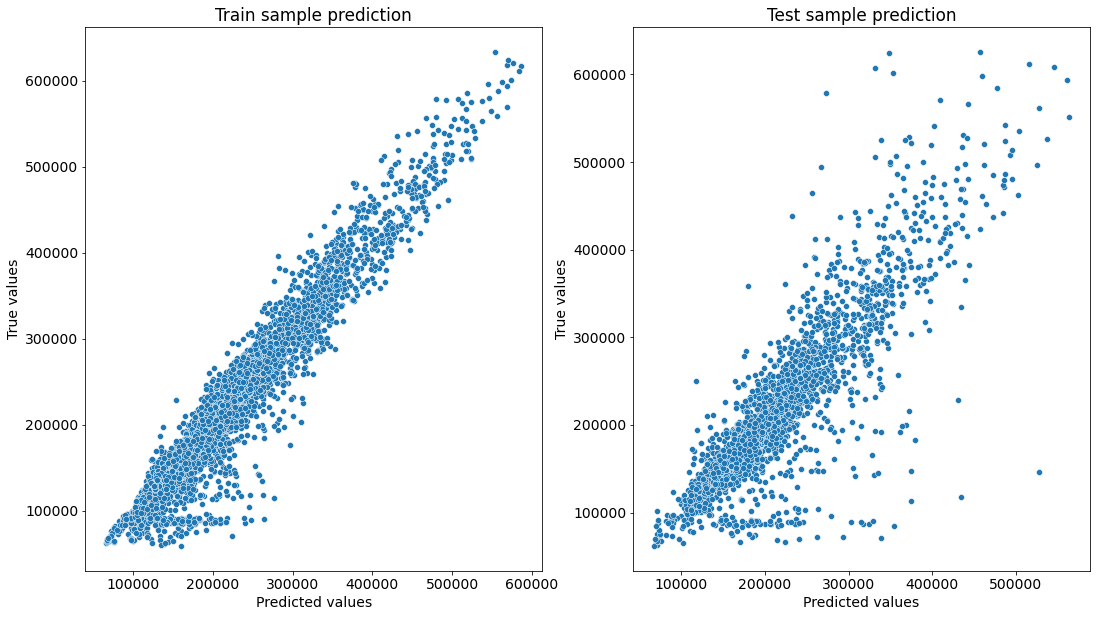

In [668]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [676]:
forest = RandomForestRegressor()
forest.fit(x, y)

RandomForestRegressor()

In [677]:
itog_test = test_df[feat]
itog_test = itog_test.fillna(0)
pred = pd.DataFrame(forest.predict(itog_test), columns=['pred'])
pred

,pred
0,159965.760992
1,133224.638828
2,201320.644264
3,175702.604848
4,151133.665608
...,...
4442,125166.131885
4443,210452.839968
4444,163926.048794
4445,165867.407604


In [679]:
pred.to_csv('polinashubenok_predict.csv')